# Association rules - Polish film actors, i.e. researching the role of connections in this guild
### Authors: Michał Woźniak (id: 385190), Michał Wrzesiński (id: 385197)
### Date: 30.12.2019

# 1. Introduction
## 1.1 Background
The world of economics is built on the basis of interpersonal relationships, they create space and motivate agents' activities. The science that extensively describes and explores these relationships is among others behavioral economics (which uses for instance the creation of Social Networks). This relatively new area has brought a new perspective on multi-agent modeling. <br><br> Going deeper, we are all aware of the role of human connections in our lives. They define and redefine a significant part of human life events. Some of them arise per se from the institution of the family (impact on social mobility ([Barone and Mocetti from 2015](https://www.eui.eu/Documents/DepartmentsCentres/Economics/Seminarsevents/Mocetti.pdf))), while some are generated by the man himself based on his decisions during his existence. Obviously connections might occur in many fields for example: politics ([Fisman from 2001](https://sites.bu.edu/fisman/files/2015/11/AER01-Suharto.pdf)), financial markets ([Harvison from 2019](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3387495)), job market etc. We have to be aware that, they can also penetrate each other.<br><br>
Unsupervised Learning can be useful group of tools for studying this problem. To be more specific we can utilize Association rules for analyzing relationships/connections between people. They allow us to know, understand and visualize relationships between people using simple statistical rules. In the past, scientists have successfully attempted such and similar analyzes [Mahoto et al. from 2014](https://link.springer.com/chapter/10.1007/978-3-319-10987-9_14).

## 1.2 Object and purpose of the study
In this paper authors would like to explore the issue of human connections in the labor market in the field of film acting. It is motivated by the fact that actors are creating very special, non trivial professional guild. We can call them somewhat freelancers. Each film is a separate project, after which they must search for a new offer on the job market. However, very often, as movie viewers, we feel that a given group of actors appear together on the cinema screen very often. Usually this is not a coincidence. This might be influenced by the producer and/or director. We can assume that reputation and opinion plays a very important role in this profession.<br><br>

During this research authors have focused especially on Polish filmography. Association rules require, in a way, that the objects subject to analysis come from one period (in order to be able to base the conclusion on the pseudo-homogeneity of agents), so scientists decided to focus on the most popular films which were produced during last decade (2010-2019) in Poland.<br><br>

To sum up, scientist were looking for association rules among polish film's actors. They want to check if their subjective feelings about the topic are in line with empirical analysis. The conclusions of this analysis can be used both as a source of knowledge in the field of behavioral economics and as tips for beginning actors.

## 1.3 Scientific hypothesis
The major hypothesis verified in this paper is: whether analyzing Polish films (and their actors) we can find patterns testifying to the existence of connections in this specific guild?

# 2. Methodology of the research

## 2.1 Association rules

### 2.1.1 Definition

tutaj definicja: regół asocjacyjnych oraz 4 podstawowych miar asocjacji

### 2.1.2 Algorithms

tutaj definicje: The Eclat Algorithm, The Apriori algorithm

## 2.2 Data

The researchers collected data on the cast of the most popular Polish films from 2010-2019. Information about the ranking of films and actors playing in them was derived from the Filmweb.pl portal. For further analysis, the authors needed to obtain the following data structure: list of lists, where the "mother" list aggregates knowledge at the film level, and each "child" list aggregates knowledge at the actor level.

To scrape data authors used Python and libraries like: Selenium and BeautifulSoup.<br>
<br>
In practice, downloading the necessary information for this analysis was not trivial. It requires a three-step approach. First, the HTML code of Polish film rankings for the years 2010-2019 was downloaded from the Filmweb using the Selenium library (this is dynamic page). Then the direct links to the movies were extracted from the above code (using BeautifulSoup). After modifying these links, they redirected directly to the cast of the given film. Eventually, the cast was scraped per film. Finally we obtained a "matrix" with 570 rows (movies) and their corresponding actors.

#### Dependencies loading

```python
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import xlsxwriter
```

Creating objects that store data.

```python
list_of_the_top_films_by_year = list() #list of links to the cast of each film
list_of_actors = list() #final list of the lists of actors
html_code = list() #list for HTML codes, elements of the list refer to the year of ranking
```

Scraping HTML codes of rankings for each year.

```python
driver = webdriver.Chrome()

for i in range(2010,2020):
    driver.get(f"https://www.filmweb.pl/ranking/film/Polska/42/{i}")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    html_code.append(driver.page_source)
```

Extracting and modifying links to the movies from above HTML code.

```python
for i in html_code:
    soup = BeautifulSoup(i, 'html.parser')
    for link in soup.findAll('a', {'class': 'film__link'}):
        try:
            list_of_the_top_films_by_year.append("https://www.filmweb.pl"+link['href']+"/cast")
        except:
            pass
```

Creating list of the lists of actors from cast web-pages.

```python
for i in list_of_the_top_films_by_year:
    tmp = list()
    web_page = requests.get(i)
    soup =  BeautifulSoup(web_page.text, 'html.parser')
    for j in soup.findAll('a', {'class': 'pImg46'}):
        tmp.append(j["title"])
    list_of_actors.append(tmp)
```

Applying some adjustments like: characters replacing, removing films without actors.

```python
list_of_actors_cleared = list()

for i in list_of_actors:
    if(len(i)!=0):
        tmp = list()
        for k in i:
            foo = k.replace(" ","_")
            foo = foo.replace("-","_")
            tmp.append(foo)
        list_of_actors_cleared.append(tmp)
```

Saving obtained dataset to the Excel file. After that Excel file was manually converted to CSV extension.

```python
with xlsxwriter.Workbook('datasets/dataset.xlsx') as workbook:
    worksheet = workbook.add_worksheet()
    for row_num, data in enumerate(list_of_actors_cleared):
        worksheet.write_row(row_num, 0, data)
```

## 2.3 Approach

The following steps were taken to conduct the study:
1. Explanatory Data Analysis of dataset
2. Cross Tables analysis
3. Eclat algorithm
4. OPUS algorithm
5. Apriori algorithm
6. Additional quality measures
7. Conclusions

# 3. Modeling

#### Dependencies loading

In [40]:
library(arules) #library dedicated to association rules analysis
library(arulesViz) #library dedicated to visualize association rules
library(repr) #library dedicated to r plots adjustments
library(opusminer) #library for OPUS algo 
options(warn=-1) #turn off warnings in R
options(repr.plot.width=15, repr.plot.height=7) #plotting options

#### Dataset loading

In [74]:
df <-read.transactions("datasets/dataset.csv", format="basket", sep=",", skip=0)

### Explanatory Data Analysis for dataset

Dataset has 567 rows (unique films) and 11659 unique columns (unique actors).

In [75]:
items(df)

itemMatrix in sparse format with
 567 rows (elements/transactions) and
 11659 columns (items)

Below we posted random three rows (itemsets/films) from our dataset.

In [82]:
LIST(df[sample(nrow(df), 2), ])

[[1]]
 [1] "Andrzej_Blumenfeld"     "Andrzej_Stanaszek"      "Antoni_Janik"          
 [4] "Filip_Pławiak"          "Jon_Digby"              "Lech_Mackiewicz"       
 [7] "Lee_Ross"               "Lianne_Harvey"          "Małgorzata_Mikołajczak"
[10] "Mark_Wakeling"          "Robert_Mika"            "Ruby_Bentall"          
[13] "Tilly_Gaunt"            "Tomasz_Kot"            

[[2]]
 [1] "Aleksandra_Góralczyk"    "Aleksandra_Hamkało"     
 [3] "Anna_Mucha"              "Barbara_Zielińska"      
 [5] "Dariusz_Toczek"          "Elżbieta_Romanowska"    
 [7] "Ewa_Kasprzyk"            "Grażyna_Błęcka_Kolska"  
 [9] "Jakub_Kucner"            "Jerzy_Rogalski"         
[11] "Joanna_Jarmołowicz"      "Katarzyna_Łaniewska"    
[13] "Katarzyna_Skrzynecka"    "Maciej_Zakościelny"     
[15] "Małgorzata_Rożniatowska" "Mariusz_Winnicki"       
[17] "Mateusz_Grydlik"         "Mayu_Gralińska_Sakai"   
[19] "Michalina_Sosna"         "Mikołaj_Roznerski"      
[21] "Monika_Dryl"             "Nikodem_Rozbicki"       
[23] "Noel_Horta"              "Paweł_Jawor"            
[25] "Paweł_Nowisz"            "Piotr_Strycharski"      
[27] "Robert_Klatt"            "Ryszard_Warot"          
[29] "Sandra_Róg"              "Wiktor_Zborowski"       
[31] "Wojciech_Solarz"         "Yoilan_Harriette"       
[33] "Zdzisław_Wardejn"        "Zenon_Martyniuk"

Analysis of the distribution of the number of actors in the movies is also significant part.
We can obtain information that minimal number of actors in our movies is equal to 1 and maximal number is 195. Median and mean are respectively: 28 and 35.06. We can suspect that distribution is right-skewed.

In [76]:
summary(size(df))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   28.00   35.06   48.00  195.00 

To investigate this part deeply we have plotted histogram. We commit that distribution is right-skewed. In Poland, productions involving a small number of actors dominate, however, there are also high-budget films that employ over 100 actors. Interestingly, there are no movies above 200 actors.

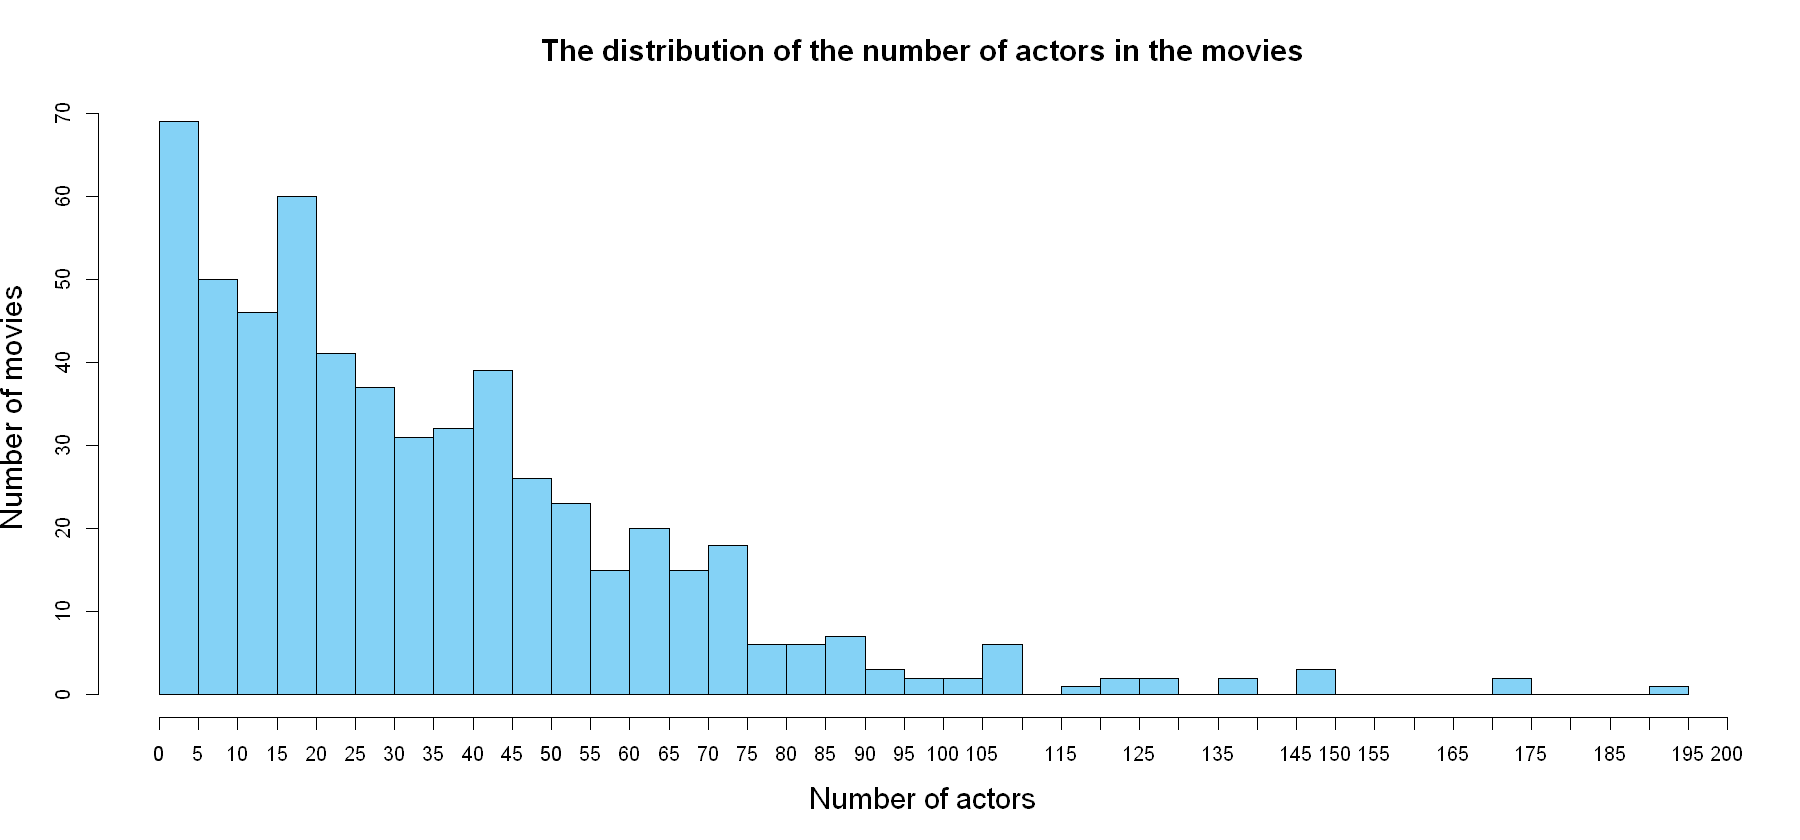

In [109]:
hist(size(df),breaks=50,col="#84D2F6",main = "The distribution of the number of actors in the movies", xlab = "Number of actors",ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(1, at=seq(0,200,by=5))

We also checked how many actors occur in the datasets more than once (they played multiple times). This number is 8219. They will be the main subject of this analysis.

In [78]:
sum(size(df)) - ncol(df)

[1] 8219

Very important information provides analysis of frequency of items (actors) in dataset. We obtained information who played the most. In Polish top 5 we have got: Janusz Chabior, Piotr Głowacki, Łukasz Simlat, Marian Dziędziel and Przemysław Bluszcz.  

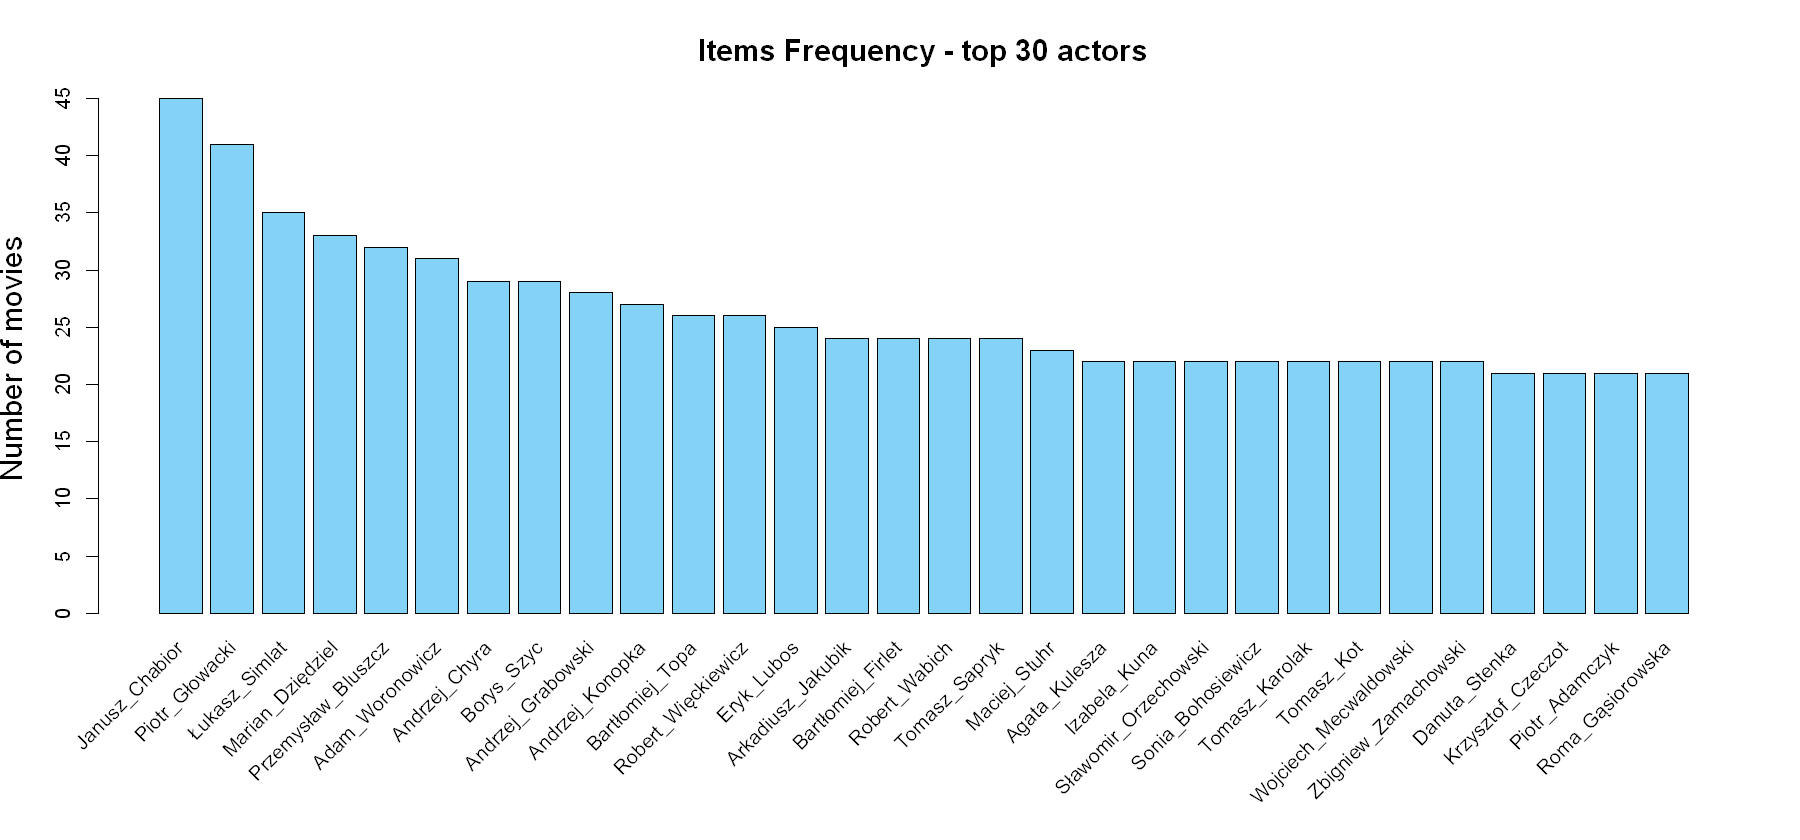

In [110]:
itemFrequencyPlot(df, topN=30, col="#84D2F6", type="absolute", main="Items Frequency - top 30 actors", cex.names=1 ,ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,60,by=5))

Authors also check how these plots looks for 500 top actors. Of course it is not fully legible, but shows the distribution of the number of roles played per actor. It is clear that there is a group of actors who play a lot, but those a little less popular also play a lot. The number of roles played falls quite smoothly (no significant spikes apparent).

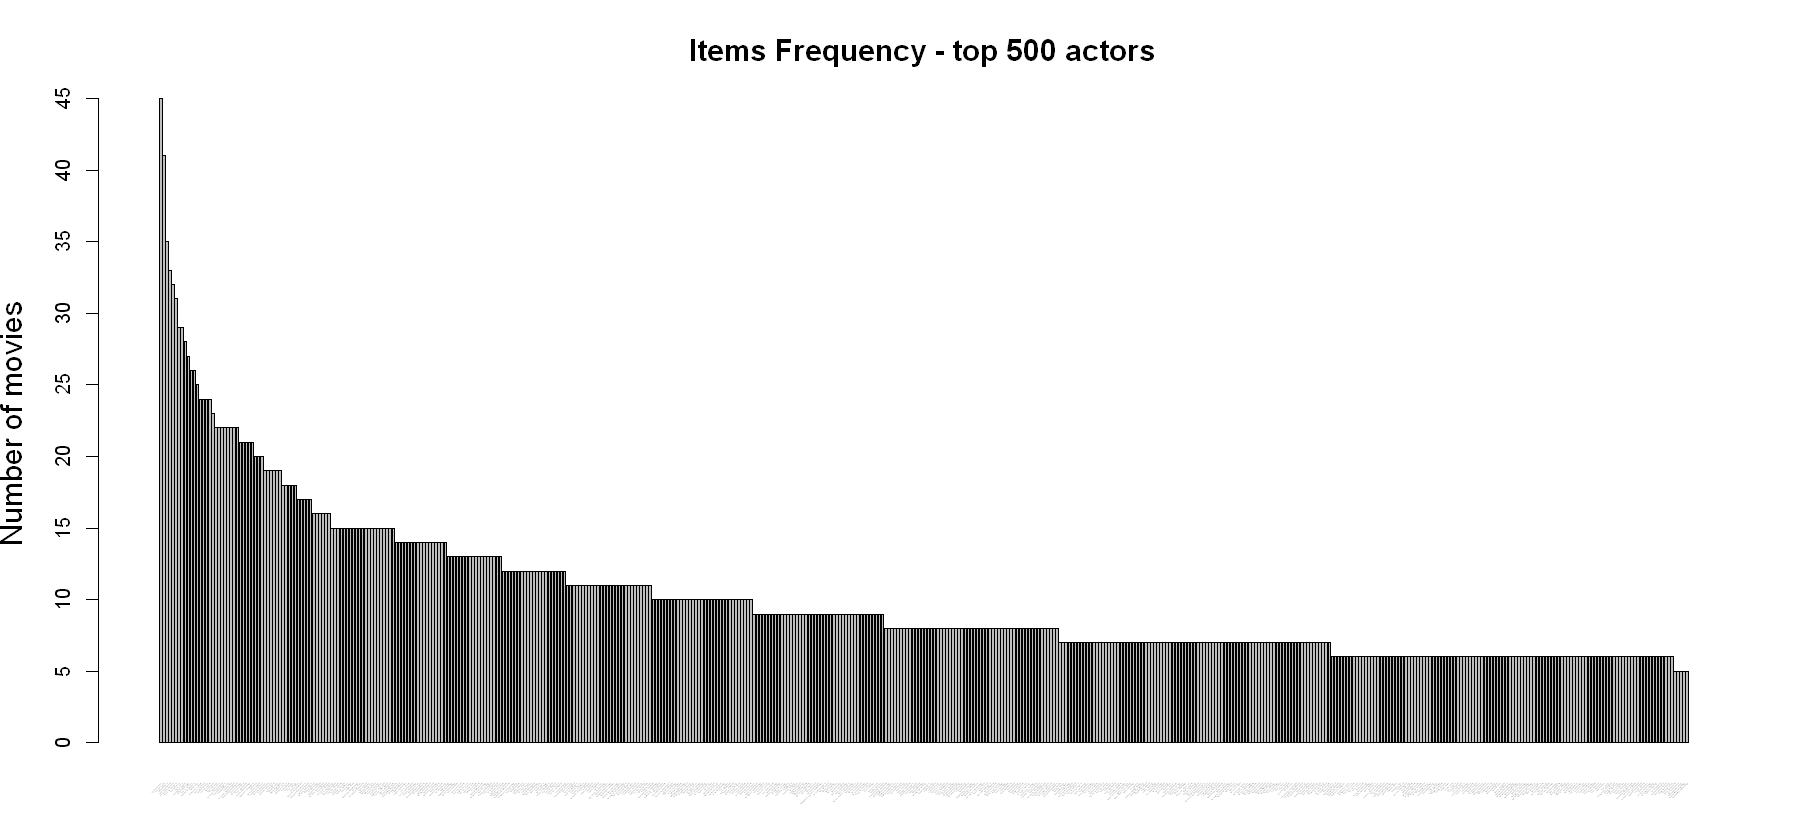

In [113]:
itemFrequencyPlot(df, topN=500, type="absolute", main="Items Frequency - top 500 actors", cex.names=0.001 ,ylab = "Number of movies",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,60,by=5))

Relative items frequency plot for top 30 actors shows the percentage share of roles played by the actors from the general pool of films, for instance Janusz Chabior played in 7.8% possible films. It's a decent score!

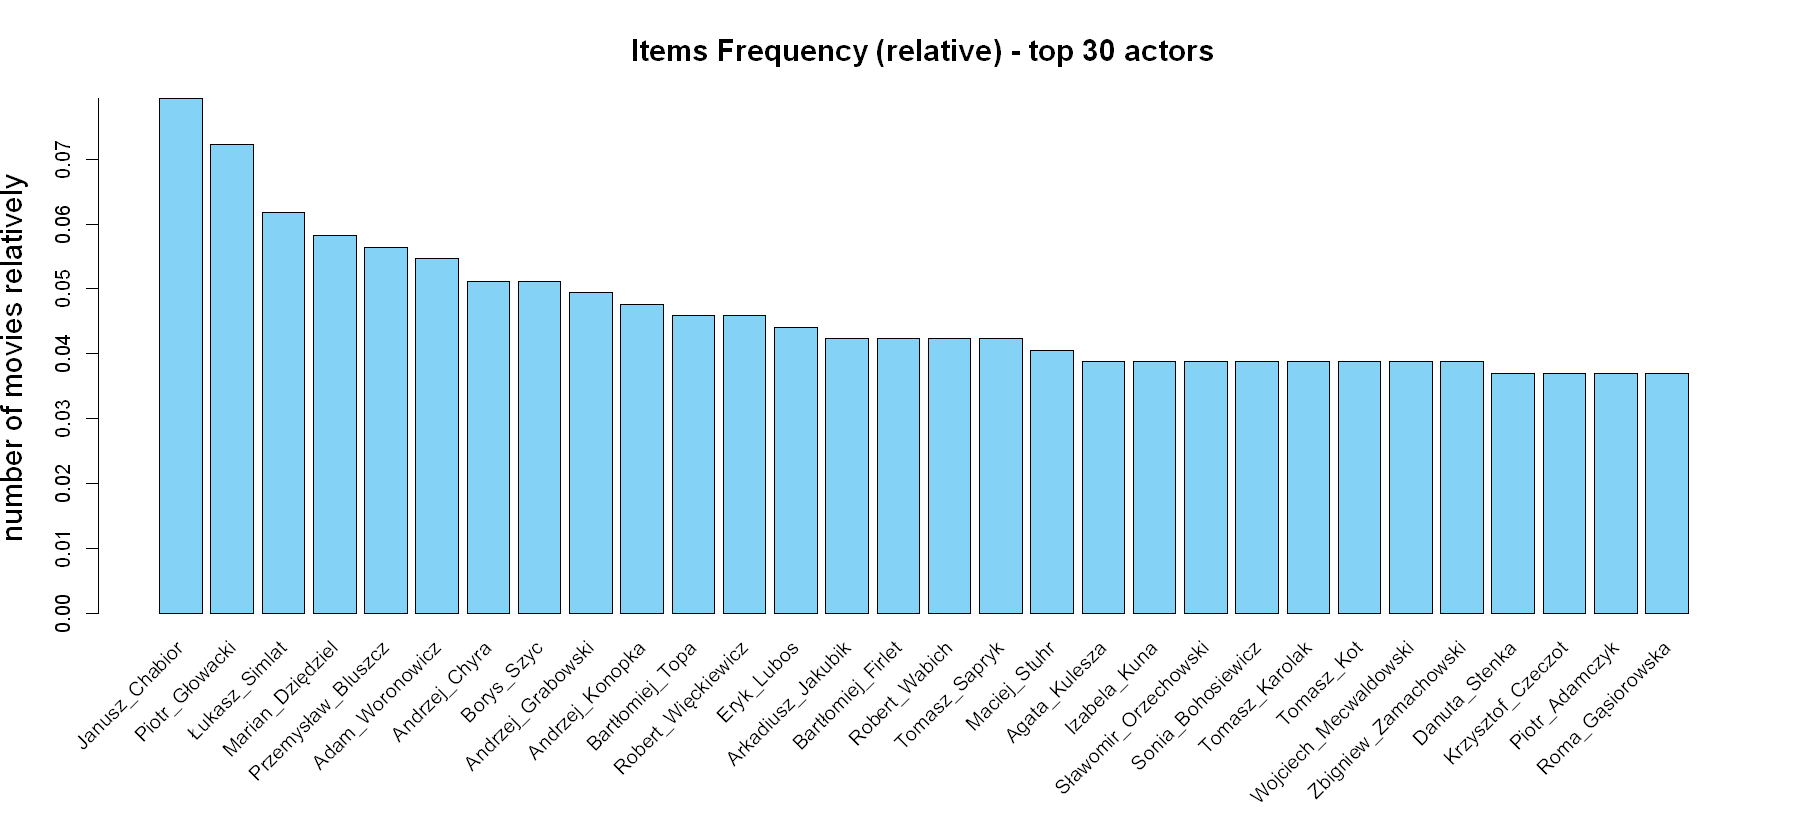

In [112]:
itemFrequencyPlot(df, topN=30,col="#84D2F6", type="relative", main="Items Frequency (relative) - top 30 actors", cex.names=1 ,ylab = "number of movies relatively",cex.lab=1.5, cex.main=1.5, cex.sub=1.5)
axis(2, at=seq(0,0.2,by=0.01))

Top 10 actors (according to frequency) and their relative frequency:

In [42]:
head(sort(itemFrequency(df), decreasing=TRUE), n=10)

Janusz_Chabior     Piotr_Głowacki      Łukasz_Simlat   Marian_Dziędziel 
        0.07894737         0.07192982         0.06140351         0.05789474 
Przemysław_Bluszcz    Adam_Woronowicz      Andrzej_Chyra         Borys_Szyc 
        0.05614035         0.05438596         0.05087719         0.05087719 
 Andrzej_Grabowski    Andrzej_Konopka 
        0.04912281         0.04736842

The above analysis suggests that the reliable metrics in the analysis will be: Confidence and Lift, while Support, due to the specifics of the dataset, will not play a significant role here.

### Cross Table

Simple cross tables of count and lift may also provide some interesting information about relations between actors.

Count cross table shows who acted with whom and how much, for example Eryk Lubos acted 6 times with Marian Dziędziel. Already in such a simple analysis you can see that the most popular actors play quite often together (10 years period). The highest count is 8.

In [115]:
crossTable(df, measure="count", sort=TRUE)[1:20,1:20]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet,Robert_Wabich,Tomasz_Sapryk,Maciej_Stuhr,Agata_Kulesza,Izabela_Kuna
Janusz_Chabior,45,6,5,5,5,8,3,3,6,1,2,3,8,3,4,4,3,3,3,4
Piotr_Głowacki,6,41,5,4,4,3,2,4,2,4,3,4,3,2,2,5,2,6,4,3
Łukasz_Simlat,5,5,35,6,4,4,5,3,2,3,5,4,3,2,1,3,3,1,4,6
Marian_Dziędziel,5,4,6,33,4,7,2,4,5,2,6,5,6,4,2,8,4,4,8,6
Przemysław_Bluszcz,5,4,4,4,32,3,0,2,2,3,4,4,3,3,2,2,5,3,4,2
Adam_Woronowicz,8,3,4,7,3,31,1,2,3,4,3,6,4,3,1,4,4,2,6,3
Andrzej_Chyra,3,2,5,2,0,1,29,1,3,3,2,2,2,4,1,1,1,3,0,1
Borys_Szyc,3,4,3,4,2,2,1,29,5,1,2,1,1,1,4,2,3,2,1,3
Andrzej_Grabowski,6,2,2,5,2,3,3,5,28,1,2,2,4,3,5,3,3,3,4,5
Andrzej_Konopka,1,4,3,2,3,4,3,1,1,27,4,3,2,3,1,5,1,1,3,3


Lift shows the chance of a pair of actors appearing together in a movie, relative to the product of the probability of the actors starring in two different movies. The higher the lift, the greater the chance of such an event. The highest lift belongs to pair: Eryk Lubos and Arkadiusz Jakubik (4.75). Importantly, it is clear that most of the observed lifts is over 1, which implies strong relationships between actors (the probability that they will play together rather than alone).

In [125]:
crossTable(df, measure="lift", sort=TRUE)[1:20,1:20]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet
Janusz_Chabior,NA,1.8536585,1.8095238,1.919192,1.979167,3.2688172,1.3103448,1.3103448,2.7142857,0.4691358,0.9743590,1.4615385,4.0533333,1.5833333,2.1111111
Piotr_Głowacki,1.8536585,NA,1.9860627,1.685144,1.737805,1.3453973,0.9587889,1.9175778,0.9930314,2.0596206,1.6041276,2.1388368,1.6682927,1.1585366,1.1585366
Łukasz_Simlat,1.8095238,1.9860627,NA,2.961039,2.035714,2.1013825,2.8078818,1.6847291,1.1632653,1.8095238,3.1318681,2.5054945,1.9542857,1.3571429,0.6785714
Marian_Dziędziel,1.9191919,1.6851441,2.9610390,NA,2.159091,3.9002933,1.1912226,2.3824451,3.0844156,1.2794613,3.9860140,3.3216783,4.1454545,2.8787879,1.4393939
Przemysław_Bluszcz,1.9791667,1.7378049,2.0357143,2.159091,NA,1.7237903,0.0000000,1.2284483,1.2723214,1.9791667,2.7403846,2.7403846,2.1375000,2.2265625,1.4843750
Adam_Woronowicz,3.2688172,1.3453973,2.1013825,3.900293,1.723790,NA,0.6340378,1.2680756,1.9700461,2.7240143,2.1215881,4.2431762,2.9419355,2.2983871,0.7661290
Andrzej_Chyra,1.3103448,0.9587889,2.8078818,1.191223,0.000000,0.6340378,NA,0.6777646,2.1059113,2.1839080,1.5119363,1.5119363,1.5724138,3.2758621,0.8189655
Borys_Szyc,1.3103448,1.9175778,1.6847291,2.382445,1.228448,1.2680756,0.6777646,NA,3.5098522,0.7279693,1.5119363,0.7559682,0.7862069,0.8189655,3.2758621
Andrzej_Grabowski,2.7142857,0.9930314,1.1632653,3.084416,1.272321,1.9700461,2.1059113,3.5098522,NA,0.7539683,1.5659341,1.5659341,3.2571429,2.5446429,4.2410714
Andrzej_Konopka,0.4691358,2.0596206,1.8095238,1.279461,1.979167,2.7240143,2.1839080,0.7279693,0.7539683,NA,3.2478632,2.4358974,1.6888889,2.6388889,0.8796296


### Eclat algorithm

The Eclat algorithm is used to mine frequent itemsets. It is based on support metric. In case of our analysis it is a big disadvantage, because specificity of data forces very low support. However, an attempt was made to use this algorithm to find frequent patterns in this dataset.

In [175]:
freq.items1 <- eclat(df, parameter=list(supp=0.045))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.045      1     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 25 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating sparse bit matrix ... [12 row(s), 567 column(s)] done [0.00s].
writing  ... [12 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


If minimal support is equal to 0.045 the most frequent itemsets correspond to the most frequent items. Let's try different minimal support to find itemsets with more than 1 item.

In [176]:
inspect(freq.items1,sort=true)

     items                support    count
[1]  {Piotr_Głowacki}     0.07231041 41   
[2]  {Janusz_Chabior}     0.07936508 45   
[3]  {Borys_Szyc}         0.05114638 29   
[4]  {Marian_Dziędziel}   0.05820106 33   
[5]  {Andrzej_Grabowski}  0.04938272 28   
[6]  {Adam_Woronowicz}    0.05467372 31   
[7]  {Przemysław_Bluszcz} 0.05643739 32   
[8]  {Bartłomiej_Topa}    0.04585538 26   
[9]  {Łukasz_Simlat}      0.06172840 35   
[10] {Robert_Więckiewicz} 0.04585538 26   
[11] {Andrzej_Konopka}    0.04761905 27   
[12] {Andrzej_Chyra}      0.05114638 29   


Now let's try to use Eclat with minimal support equal to 0.01 and minimal length of itemset equal to 2.

In [177]:
freq.items2 <- eclat(df, parameter=list(supp=0.01,minlen=2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 5 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating sparse bit matrix ... [495 row(s), 567 column(s)] done [0.00s].
writing  ... [55 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


We obtained 55 itemsets in such a case.

In [178]:
inspect(freq.items2,sort=true)

     items                                              support    count
[1]  {Marek_Kalita,Przemysław_Bluszcz}                  0.01058201 6    
[2]  {Łukasz_Simlat,Piotr_Tołoczko}                     0.01058201 6    
[3]  {Agata_Kulesza,Roman_Gancarczyk}                   0.01234568 7    
[4]  {Przemysław_Bluszcz,Wiesław_Cichy}                 0.01058201 6    
[5]  {Marcin_Juchniewicz,Robert_Wabich}                 0.01058201 6    
[6]  {Gabriela_Muskała,Łukasz_Simlat}                   0.01058201 6    
[7]  {Tomasz_Oświeciński,Wojciech_Kalinowski}           0.01058201 6    
[8]  {Anita_Poddębniak,Dariusz_Chojnacki}               0.01234568 7    
[9]  {Janusz_Chabior,Wojciech_Machnicki}                0.01058201 6    
[10] {Andrzej_Deskur,Piotr_Głowacki}                    0.01058201 6    
[11] {Filip_Guźla,Tomasz_Oświeciński}                   0.01058201 6    
[12] {Piotr_Głowacki,Rafał_Iwaniuk}                     0.01058201 6    
[13] {Janusz_Chabior,Rafał_Iwaniuk}                

Finally we can run Eclat with support equal to 0.008 and minimal length equal to 3. These results seem to be the most interesting.

In [179]:
freq.items3 <- eclat(df, parameter=list(supp=0.008,minlen=3))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.008      3     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 4 

create itemset ... 
set transactions ...[11659 item(s), 567 transaction(s)] done [0.01s].
sorting and recoding items ... [690 item(s)] done [0.00s].
creating sparse bit matrix ... [690 row(s), 567 column(s)] done [0.00s].
writing  ... [7 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


As we can see below, we have got 7 itemsets which meet the set limits. These are "the most popular" groups of actors (according to support metric). The number of movies played together is high (5 or more).

In [180]:
inspect(freq.items3,sort=true)

    items                                                support     count
[1] {Arkadiusz_Jakubik,Michał_Gadomski,Robert_Wabich}    0.008818342 5    
[2] {Filip_Guźla,Tomasz_Oświeciński,Wojciech_Kalinowski} 0.008818342 5    
[3] {Filip_Guźla,Robert_Szewczyk,Tomasz_Oświeciński}     0.008818342 5    
[4] {Filip_Guźla,Piotr_Stramowski,Tomasz_Oświeciński}    0.008818342 5    
[5] {Agata_Kulesza,Marcin_Dorociński,Marian_Dziędziel}   0.010582011 6    
[6] {Marcin_Dorociński,Marian_Dziędziel,Robert_Wabich}   0.008818342 5    
[7] {Arkadiusz_Jakubik,Izabela_Kuna,Robert_Wabich}       0.008818342 5    


Now we can investigate induction of the rules from obtained itemsets. We set threshold for confidence to 0.75. Results seem to be reasonable. It will be useful to project results to count metric for example: for the pair {Arkadiusz Jakubik, Robert Wabich} and {Michał Gadomski} we obtained support equal to 0.0088 and confidence equal to 0.83, which means that this pair plays together in 5 movies (5/567 == support) and only one time they did not play together (5/6 == confidence).

In [183]:
freq.rules<-ruleInduction(freq.items3, df, confidence=0.75)
inspect((freq.rules))

     lhs                      rhs                       support confidence     lift itemset
[1]  {Michał_Gadomski,                                                                     
      Robert_Wabich}       => {Arkadiusz_Jakubik}   0.008818342  1.0000000 23.62500       1
[2]  {Arkadiusz_Jakubik,                                                                   
      Robert_Wabich}       => {Michał_Gadomski}     0.008818342  0.8333333 67.50000       1
[3]  {Arkadiusz_Jakubik,                                                                   
      Michał_Gadomski}     => {Robert_Wabich}       0.008818342  1.0000000 23.62500       1
[4]  {Tomasz_Oświeciński,                                                                  
      Wojciech_Kalinowski} => {Filip_Guźla}         0.008818342  0.8333333 67.50000       2
[5]  {Filip_Guźla,                                                                         
      Wojciech_Kalinowski} => {Tomasz_Oświeciński}  0.008818342  1.0000000 37.80

Analyzing the above results, it is unequivocal that these people often play with each other and if they act, they act together, not separately.

### OPUS algorithm

We utilize OPUS algorithm to find top productive non-redundant itemsets with respect to the lift measure.

In [204]:
result = opus(df, k = 1000, format = "data.frame", sep = " ",
print_closures = TRUE, filter_itemsets = TRUE, search_by_lift = TRUE,
correct_for_mult_compare = TRUE, redundancy_tests = TRUE)

Reading file/data...

Finding itemsets (567 transactions, 11659 items)...

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

All relevant results are summarized below. We obtained: top productive itemsets, their counts and closures. Most of the actors received are not very popular and second and third-line. To a large extent they played roles in Patryk Vega's productions. In this case, we can clearly see the close relationship with the director. A group of Ukrainian actors appear together on the screen due to the roles played (requiring native Ukrainian skills). They play roles with various directors.

In [205]:
result[result$value !=0, c("itemset","count","closure")]

itemset,count,closure
"Mariusz_Chałat, Rafał_Sadowski",4,
"Robert_Sysik, Tomasz_Kotowski",4,"Andrzej_Grabowski, Tomasz_Oświeciński, Robert_Sysik, Tomasz_Kotowski"
"Adam_Krzyżanek, Marek_Krzyżanek",4,
"Roman_Skorovskiy, Serhiy_Bachyk",4,"Oleh_Kyryliv, Roman_Skorovskiy, Serhiy_Bachyk"
"Filip_Guźla, Piotr_Mocarski",5,


### Apriori algorithm

#### Defining main rules

Finally we decided to use Apriori algorithm to produce additional rules and their implications. Apriori algo requires two hyperparameters: support and confidence. It is not so easy to set these parameters in right manner. We want to obtain many rules (more than 20) which implies reasonable power (confidence). Taking it into account, we set support to 0.0075 and confidence to 0.5.

In [241]:
rules_main <- apriori(df, parameter = list(support = 0.0075, confidence = 0.5, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5  0.0075      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 567 transaction(s)] done [0.03s].
sorting and recoding items ... [690 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [55 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Summary of created rules shows that we have got 55 rules, where mean support is 0.009, mean confidence is 0.736 and median count is 5.21.

In [242]:
summary(rules_main)

set of 55 rules

rule length distribution (lhs + rhs):sizes
 2  3 
34 21 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.382   3.000   3.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.008818   Min.   :0.5000   Min.   : 6.915   Min.   :5.000  
 1st Qu.:0.008818   1st Qu.:0.6250   1st Qu.:16.875   1st Qu.:5.000  
 Median :0.008818   Median :0.7143   Median :23.625   Median :5.000  
 Mean   :0.009203   Mean   :0.7360   Mean   :31.677   Mean   :5.218  
 3rd Qu.:0.008818   3rd Qu.:0.8333   3rd Qu.:44.212   3rd Qu.:5.000  
 Max.   :0.012346   Max.   :1.0000   Max.   :81.000   Max.   :7.000  

mining info:
 data ntransactions support confidence
   df           567  0.0075        0.5

#### Top rules 

Now we can inspect top 7 rules sorted by: confidence, lift and count.

Top 7 rules by confidence are posted below. Every rule has confidence equal to 1. It means that for example Jarosław Gruda always plays with Bartosz Kopeć, if Bartosz plays at all.

In [249]:
inspect(head(sort(rules_main, by ="confidence"),7))

    lhs                      rhs                      support confidence   lift count
[1] {Bartosz_Kopeć}       => {Jarosław_Gruda}     0.008818342          1 56.700     5
[2] {Piotr_Mocarski}      => {Filip_Guźla}        0.008818342          1 81.000     5
[3] {Mariusz_Kierzek}     => {Tomasz_Oświeciński} 0.008818342          1 37.800     5
[4] {Arkadiusz_Jakubik,                                                              
     Michał_Gadomski}     => {Robert_Wabich}      0.008818342          1 23.625     5
[5] {Michał_Gadomski,                                                                
     Robert_Wabich}       => {Arkadiusz_Jakubik}  0.008818342          1 23.625     5
[6] {Filip_Guźla,                                                                    
     Wojciech_Kalinowski} => {Tomasz_Oświeciński} 0.008818342          1 37.800     5
[7] {Filip_Guźla,                                                                    
     Robert_Szewczyk}     => {Tomasz_Oświeciński} 0.00

Based on top lift rules, we can conclude, for example, that if Robert Szewczuk and Tomaz Oświęcimski play in the movie, they are 67% more likely to play with Filip Guźla than separately.

In [253]:
inspect(head(sort(rules_main, by ="lift"),7))

    lhs                      rhs                       support confidence    lift count
[1] {Piotr_Mocarski}      => {Filip_Guźla}         0.008818342  1.0000000 81.0000     5
[2] {Filip_Guźla}         => {Piotr_Mocarski}      0.008818342  0.7142857 81.0000     5
[3] {Robert_Szewczyk,                                                                  
     Tomasz_Oświeciński}  => {Filip_Guźla}         0.008818342  1.0000000 81.0000     5
[4] {Arkadiusz_Jakubik,                                                                
     Robert_Wabich}       => {Michał_Gadomski}     0.008818342  0.8333333 67.5000     5
[5] {Tomasz_Oświeciński,                                                               
     Wojciech_Kalinowski} => {Filip_Guźla}         0.008818342  0.8333333 67.5000     5
[6] {Piotr_Stramowski,                                                                 
     Tomasz_Oświeciński}  => {Filip_Guźla}         0.008818342  0.8333333 67.5000     5
[7] {Filip_Guźla,               

Top rules by count shows pairs of lhs and rhs which are the most frequent in dataset after rules application. For instance Roman Gancarczyk played with Agata Kulesza 7 times and their confidence is equal to 0.5 (this reminds us that Agata Kulesza plays a large number of films).

In [252]:
inspect(head(sort(rules_main, by ="count"),7))

    lhs                      rhs                  support    confidence
[1] {Roman_Gancarczyk}    => {Agata_Kulesza}      0.01234568 0.5000000 
[2] {Marek_Kalita}        => {Przemysław_Bluszcz} 0.01058201 0.5000000 
[3] {Piotr_Tołoczko}      => {Łukasz_Simlat}      0.01058201 0.6666667 
[4] {Marcin_Juchniewicz}  => {Robert_Wabich}      0.01058201 0.5454545 
[5] {Wojciech_Kalinowski} => {Tomasz_Oświeciński} 0.01058201 0.7500000 
[6] {Wojciech_Machnicki}  => {Janusz_Chabior}     0.01058201 0.7500000 
[7] {Andrzej_Deskur}      => {Piotr_Głowacki}     0.01058201 0.6666667 
    lift      count
[1] 12.886364 7    
[2]  8.859375 6    
[3] 10.800000 6    
[4] 12.886364 6    
[5] 28.350000 6    
[6]  9.450000 6    
[7]  9.219512 6    


#### Plots

To increase the explainability and clarity of the rules, two charts were used: scatter plot and graph plot.

We utilize scatter plot by plotting rules in confidence and count axes and color them with lift. The results are consistent with previous analyzes. The smaller the count, the greater confidence and lift.

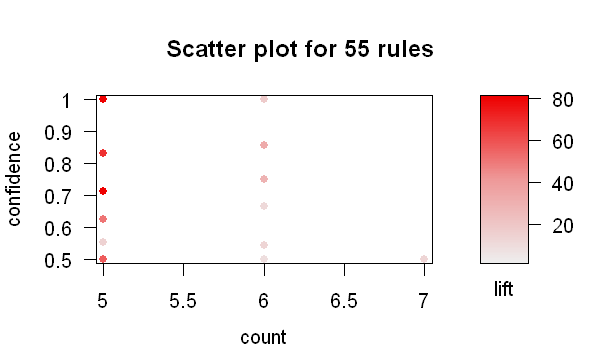

In [277]:
options(repr.plot.width=5, repr.plot.height=3)
plot(rules_main, measure=c("count", "confidence"), shading="lift", interactive=FALSE,jitter = 0)

Graph plot perfectly illustrates the rules created in the previous steps. It makes inference easier. The size of the points corresponds to count while the color corresponds to confidence. The larger the point, the larger the count, the redder the point, the greater confidence. By observing the chart below, we can easily adjust directors / movies to actors.

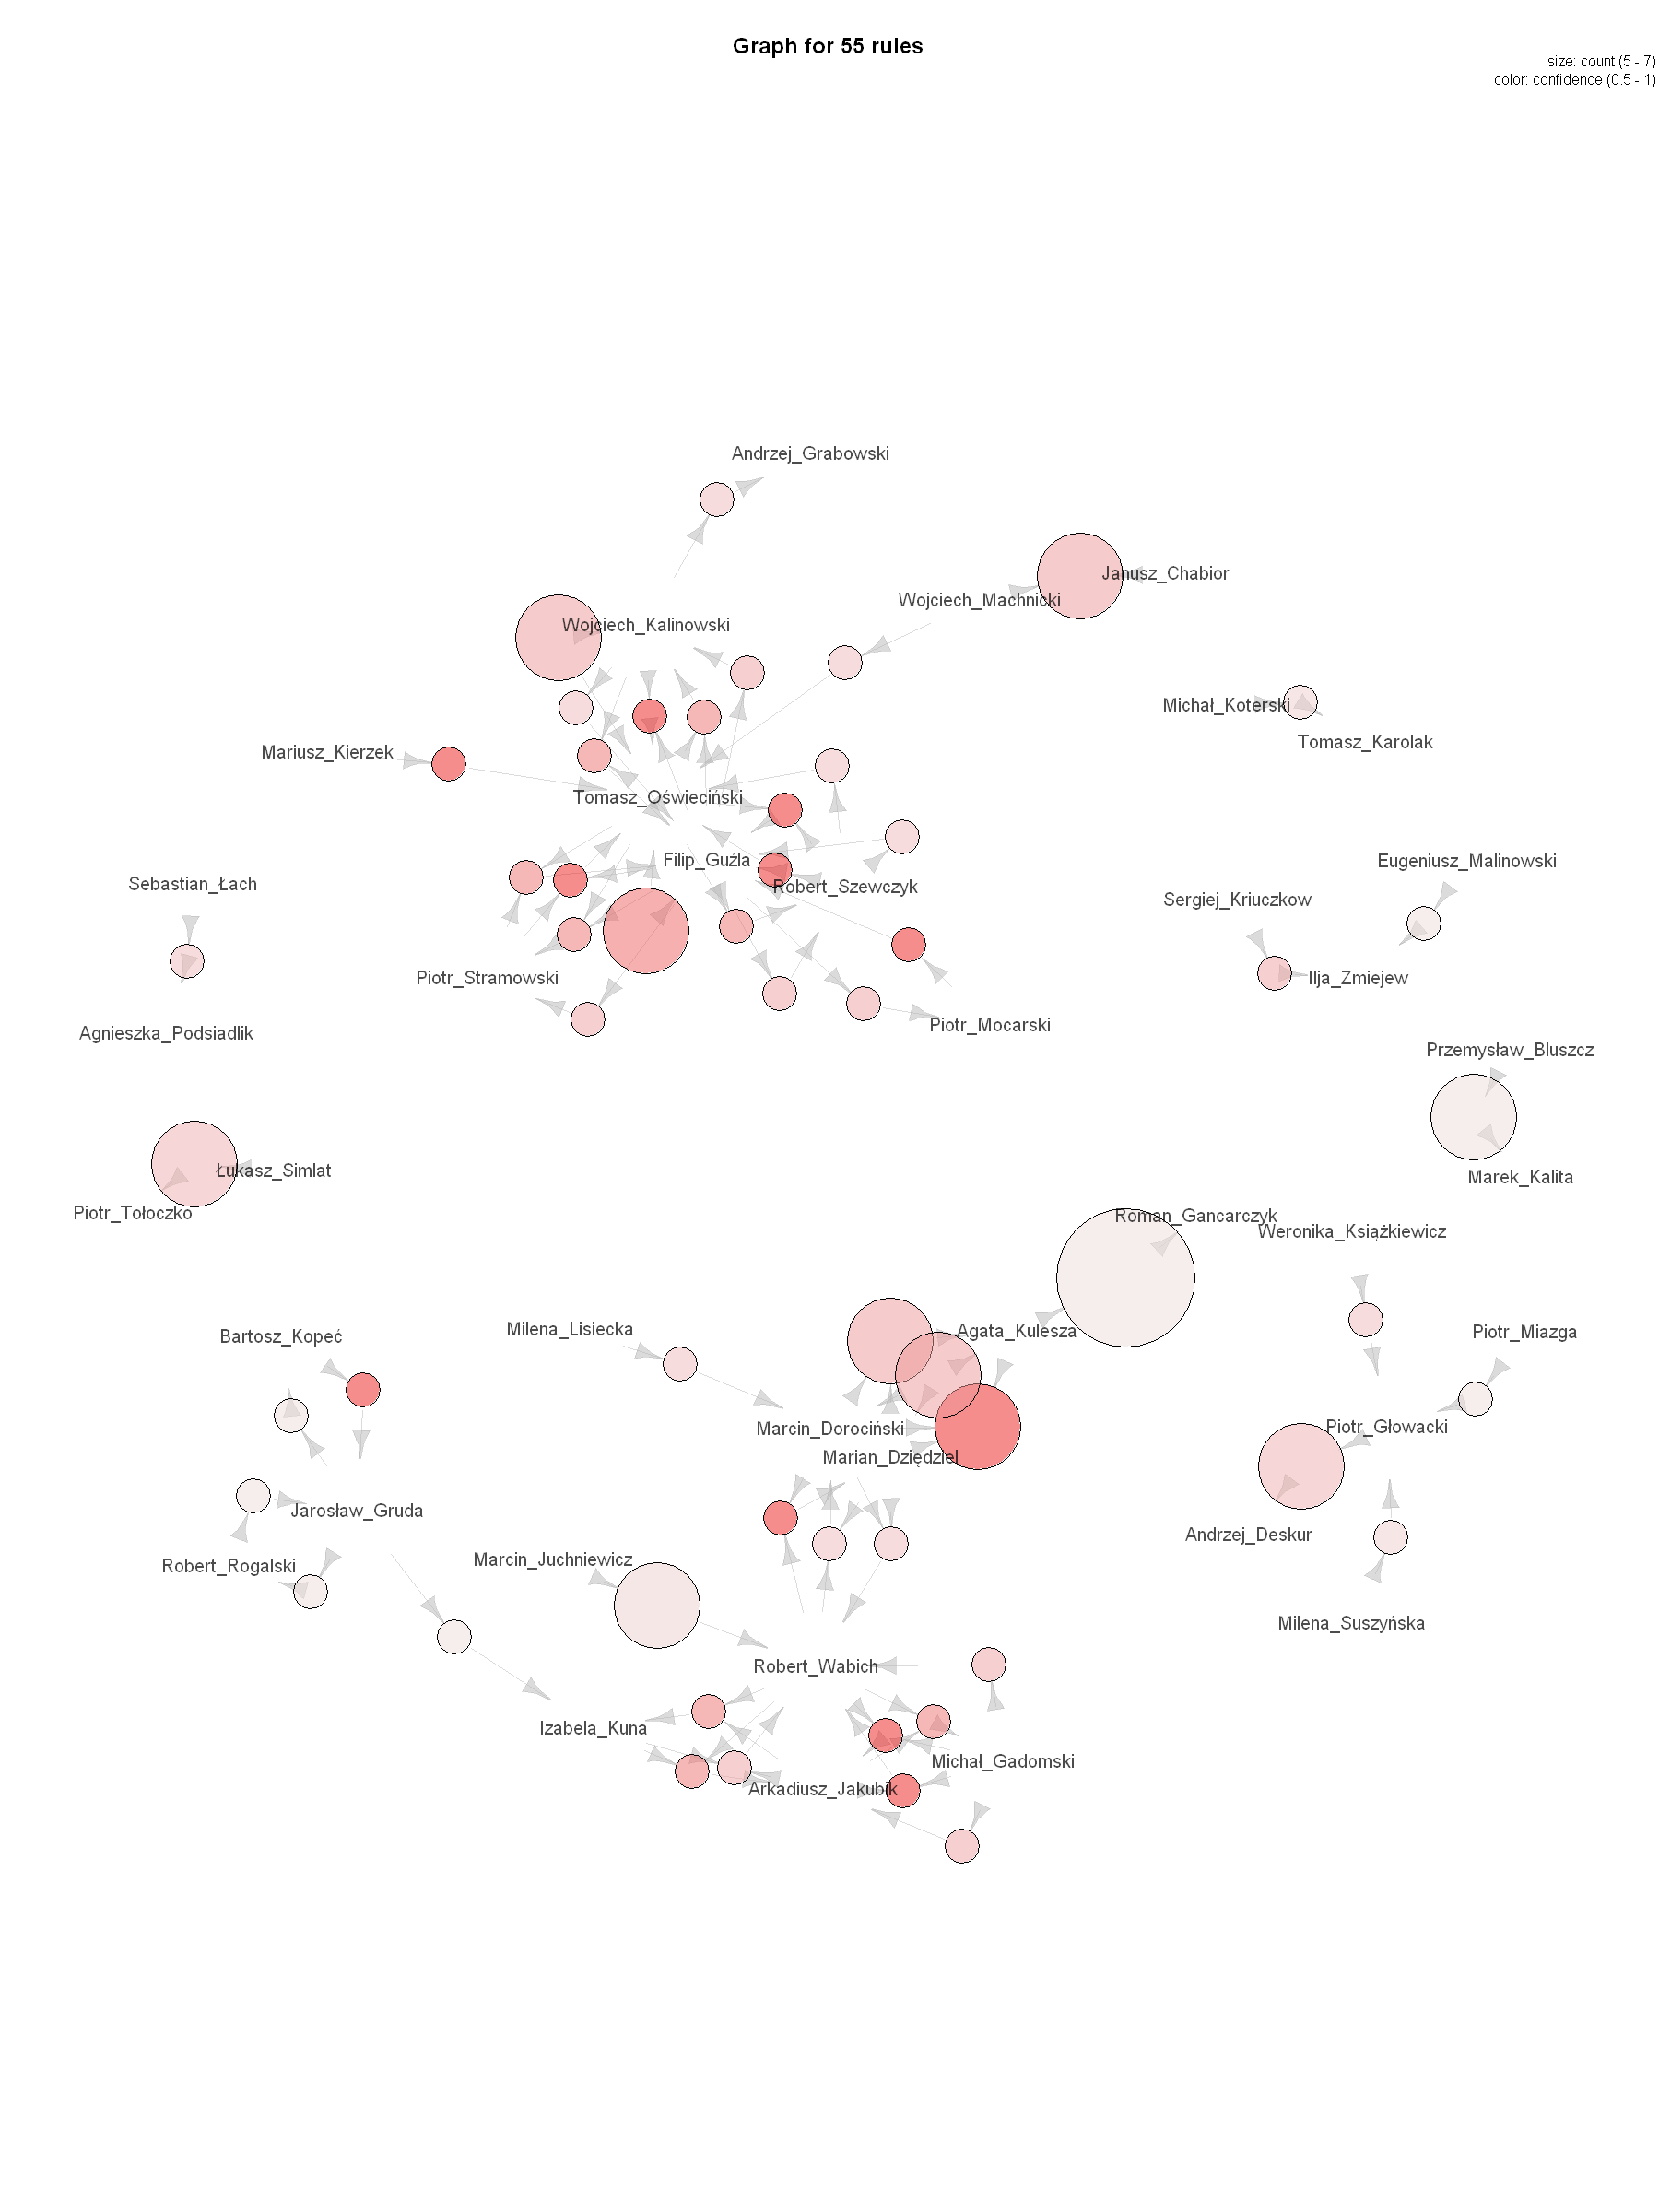

In [283]:
options(repr.plot.width=15, repr.plot.height=20)
plot(rules_main, method="graph",shading="confidence",measure ="count")

#### Induction - individual rule analysis

We will conduct now induction analysis (focus on particular actors). We selected, among others, the most frequently appearing actors in the collection and those liked by us: Janusz Chabior, Andrzej Chyra, Marian Dziędziel and Piotr Stramowski.

In [294]:
rules.chabior <- apriori(data=df,  
                      parameter=list(supp=0.005, conf = 0.01, target="rules"), 
                      appearance = list(default="lhs", rhs="Janusz_Chabior"), 
                      control=list(verbose=F)) 

In [295]:
rules.chabior.byconf <- sort(rules.milk, by="confidence", decreasing=TRUE)

In [296]:
inspect(rules.chabior.byconf)

      lhs                             rhs                  support confidence      lift count
[1]   {Grzegorz_Mostowicz_Gerszt}  => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[2]   {Bartłomiej_Górecki}         => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[3]   {Andrzej_Zazdrosiński}       => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[4]   {Jolanta_Niedźwiecka}        => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[5]   {Irmina_Lizończyk_Prosenico} => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[6]   {Agata_Załęcka,                                                                        
       Olga_Bołądź}                => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[7]   {Andrzej_Zazdrosiński,                                                                 
       Katarzyna_Warnke}           => {Janusz_Chabior} 0.005291005 1.00000000 12.600000     3
[8]   {Andrzej_Zazdrosiński,                                

### Affinity measure - additional quality measure

We can also provide additional quality measure of association rules - affinity measure. In our case it will explain how similar actors are (what kind of films they play, what director they play). The higher the value of the index the higher similarity. It is reasonable to set minimal frequency of items for our dataset. Value 0.05 seems to be good choice. 

In [324]:
affinity_res = affinity(df[,itemFrequency(df)>0.05])
round(affinity_res, 2)

,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Janusz_Chabior,Łukasz_Simlat,Marian_Dziędziel,Piotr_Głowacki,Przemysław_Bluszcz
Adam_Woronowicz,0.00,0.02,0.03,0.12,0.06,0.12,0.04,0.05
Andrzej_Chyra,0.02,0.00,0.02,0.04,0.08,0.03,0.03,0.00
Borys_Szyc,0.03,0.02,0.00,0.04,0.05,0.07,0.06,0.03
Janusz_Chabior,0.12,0.04,0.04,0.00,0.07,0.07,0.07,0.07
Łukasz_Simlat,0.06,0.08,0.05,0.07,0.00,0.10,0.07,0.06
Marian_Dziędziel,0.12,0.03,0.07,0.07,0.10,0.00,0.06,0.07
Piotr_Głowacki,0.04,0.03,0.06,0.07,0.07,0.06,0.00,0.06
Przemysław_Bluszcz,0.05,0.00,0.03,0.07,0.06,0.07,0.06,0.00


It will be helpful to plot above table.

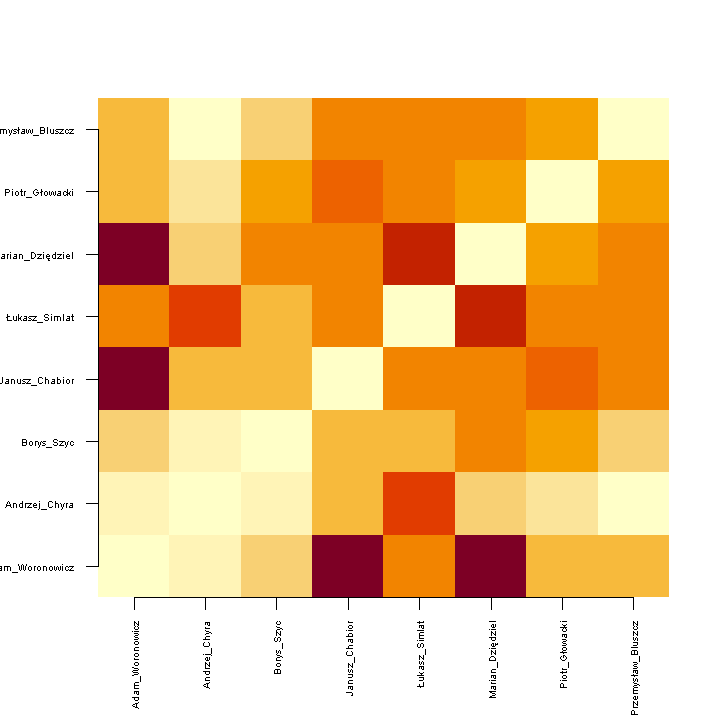

In [358]:
options(repr.plot.width=6, repr.plot.height=6)
image(affinity_res, axes = FALSE)
axis(1, at=seq(0,1,l=ncol(affinity_res)), labels=rownames(affinity_res), cex.axis=0.5, las=2)
axis(2, at=seq(0,1,l=ncol(affinity_res)), labels=rownames(affinity_res), cex.axis=0.5, las=2)

We can interpret above results like that: the redder the rectangle, the higher the similarity between actors. The highest similarity we can see between pairs: {Adam Woronowicz, Janusz Chabior} and {Adam Woronowicz, Marian Dziędziel}. From our expert knowledge, this seems reasonable.

## Conclusions

In this project we were focused on human connections in Polish filmography guild. We have used association rules (tools like: Eclat algorithm, Apriori algorithm, OPUS algorithm etc.) among polish film's actors to find significant and interesting relations between them. The data was gathered from Filmweb.pl.
<br><br>
The major hypothesis verified in this paper was: whether analyzing Polish films (and their actors) we can find patterns testifying to the existence of connections in this specific guild? Answering this hypothesis, we can say that: one can find significant relationships between Polish film actors, testifying to strong connections in this guild. The most important relationships can be found among the most popular actors, but not only!
<br><br>
We empirically confirmed our subjective premonitions and predictions in this topic. This state of affairs is caused by several variables: the influence of directors (for instance: Patryk Vega), the number of good actors in Poland, the price of actors, etc. Despite many differences, this labor market resembles other markets (especially liberal professions). Undoubtedly, such considerations are suitable for econometric modeling.


## References
(pliska też o wpisanie tego co wrzuciłem)